In [ ]:
import os

# Tạo folder tên 'my_folder'
folder_name = 'crash_prediction'
os.makedirs(folder_name, exist_ok=True)

print(f"Đã tạo thư mục: {folder_name}")

Đã tạo thư mục: crash_prediction


In [ ]:
import pandas as pd


PORTFOLIO_STOCKS = ["FPT", "SSI", "VCB", "VHM", "HPG", "GAS", "MSN", "MWG", "GVR", "VCG"]

fin_df = pd.DataFrame()
# Load price data of all stocks in portfolio, in price/1d/ folder, into a new df with a date column, then column name is stock name, and a column is average percentage change of price of all stocks in portfolio
for stock in PORTFOLIO_STOCKS:
    # Add the date to the new df
    price_data = pd.read_csv(f"./price/{stock}.csv")
    fin_df["time"] = price_data["time"]
    # Calculate the percentage change of price
    price_data["pct_change"] = price_data["close"].pct_change()

    # Add the average percentage change to the new df
    fin_df[stock] = price_data["pct_change"]

# Calculate the average percentage change of price of all stocks in portfolio by each day
fin_df["avg_pct_change"] = fin_df.iloc[:, 1:].mean(axis=1)

fin_df

,time,FPT,SSI,VCB,VHM,HPG,GAS,MSN,MWG,GVR,VCG,avg_pct_change
0,2024-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-12-03,0.019691,-0.006135,-0.012696,0.003681,0.003717,-0.007225,0.001377,-0.009934,-0.017488,-0.016667,-0.004168
2,2024-12-04,-0.010345,-0.010288,0.005305,-0.019560,-0.011111,-0.001456,-0.008253,-0.028428,-0.017799,-0.005650,-0.010759
3,2024-12-05,0.034843,0.068607,0.005437,0.032419,0.043071,0.004373,0.022191,0.049914,0.032949,0.022727,0.031653
4,2024-12-06,0.006734,0.025292,0.002067,0.002415,-0.008977,0.004354,-0.004071,0.001639,0.022329,-0.008333,0.004345
...,...,...,...,...,...,...,...,...,...,...,...,...
83,2025-04-04,-0.004405,-0.034553,-0.004975,0.020284,-0.029586,-0.060800,-0.055375,-0.034735,-0.069024,0.027295,-0.024587
84,2025-04-08,-0.069912,-0.069474,-0.070000,-0.065606,-0.069106,-0.069847,-0.068966,-0.069129,-0.068716,-0.067633,-0.068839
85,2025-04-09,0.001903,-0.067873,-0.059140,0.031915,-0.069869,-0.069597,-0.068519,-0.059003,-0.069903,-0.056995,-0.048708
86,2025-04-10,0.069326,0.067961,0.068571,0.068041,0.068075,0.068898,0.069583,0.069189,0.068894,0.068681,0.068722


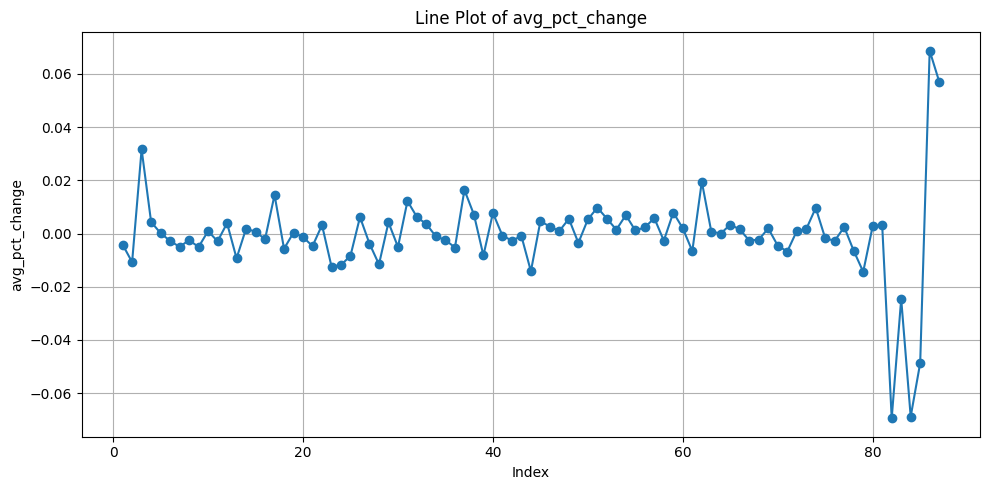

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame bạn có và 'your_column' là tên cột bạn muốn vẽ
# Nếu có cột thời gian thì nên dùng nó làm index hoặc trục x

def plot_line(df, column, x_column=None, title=None):
    plt.figure(figsize=(10, 5))

    if x_column:
        plt.plot(df[x_column], df[column], marker='o')
        plt.xlabel(x_column)
    else:
        plt.plot(df[column], marker='o')
        plt.xlabel("Index")

    plt.ylabel(column)
    plt.title(title or f"Line Plot of {column}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_line(fin_df, column="avg_pct_change")

In [ ]:
# Load crash prediction data
crash_prediction_data = pd.read_csv("crash_predictions.csv")

# Map crash_prediction "Yes/No" to 1/0
crash_prediction_data["crash_prediction"] = crash_prediction_data["crash_prediction"].map({"Yes": 0, "No": 1})

# Take only YYYY-MM-DD from time column
crash_prediction_data["time"] = crash_prediction_data["prediction_date"].str[:10]

# Drop the explanation column
crash_prediction_data = crash_prediction_data.drop(columns=["full_response"])

# Merge crash_prediction_data with fin_df on time column
crash_prediction_data = crash_prediction_data.merge(fin_df[["avg_pct_change", "time"]], on="time", how="left")

# Add a column verdict: if crash_prediction_data["crash"] == 1 and crash_prediction_data["avg_pct_change"] < -0.02 then 1 else 0
crash_prediction_data["kết quả"] = crash_prediction_data.apply(
    lambda row: 1 if (row["crash_prediction"] == 0 and row["avg_pct_change"] < -0.02)
    or (row["crash_prediction"] == 1 and row["avg_pct_change"] > -0.02)
    else 0,
    axis=1)


# crash_prediction_data = crash_prediction_data.iloc[:-7]
crash_prediction_data

,prediction_date,crash_prediction,time,avg_pct_change,kết quả
0,2025-02-05T01:00:00+07:00,0,2025-02-05,-0.000775,0
1,2025-02-06T01:00:00+07:00,1,2025-02-06,-0.002680,1
2,2025-02-07T01:00:00+07:00,0,2025-02-07,-0.000946,0
3,2025-02-10T01:00:00+07:00,0,2025-02-10,-0.014179,0
4,2025-02-11T01:00:00+07:00,0,2025-02-11,0.004614,0
5,2025-02-12T01:00:00+07:00,0,2025-02-12,0.002617,0
6,2025-02-13T01:00:00+07:00,1,2025-02-13,0.000958,1
7,2025-02-14T01:00:00+07:00,0,2025-02-14,0.005537,0
8,2025-02-17T01:00:00+07:00,0,2025-02-17,-0.003521,0
9,2025-02-18T01:00:00+07:00,1,2025-02-18,0.005307,1


In [ ]:
import pandas as pd

# Tính toán các chỉ số cho một DataFrame cụ thể
def calculate_metrics(df):
    overall_accuracy = df["verdict"].mean()

    pred_not_crash = df[df["crash_prediction"] == 1].copy()
    pred_crash = df[df["crash_prediction"] == 0].copy()

    pred_not_crash["go_up"] = pred_not_crash["avg_pct_change"] >= 0
    pred_crash["go_down"] = pred_crash["avg_pct_change"] < 0

    accuracy_not_crash_verdict = pred_not_crash["verdict"].mean()
    accuracy_not_crash_up = pred_not_crash["go_up"].mean()
    accuracy_crash_verdict = pred_crash["verdict"].mean()
    accuracy_crash_down = pred_crash["go_down"].mean()

    return {
        "Overall Accuracy": overall_accuracy,
        "Accuracy (Not Crash & Verdict)": accuracy_not_crash_verdict,
        "Accuracy (Not Crash & Price Up)": accuracy_not_crash_up,
        "Accuracy (Crash & Verdict)": accuracy_crash_verdict,
        "Accuracy (Crash & Price Down)": accuracy_crash_down
    }

# Tính toán cho cả hai dataframe
metrics1 = calculate_metrics(crash_prediction_data)
metrics2 = calculate_metrics(crash_prediction_data2)

# Tạo bảng so sánh
comparison_df = pd.DataFrame({
    "PageRank": metrics1,
    "TPPR": metrics2
})

# Hiển thị bảng so sánh
print(comparison_df)


                                 PageRank      TPPR
Overall Accuracy                 0.526316  0.710526
Accuracy (Not Crash & Verdict)   1.000000  1.000000
Accuracy (Not Crash & Price Up)  0.750000  0.592593
Accuracy (Crash & Verdict)       0.000000  0.000000
Accuracy (Crash & Price Down)    0.500000  0.272727


TPPR

In [ ]:
print("Overall accuracy:", crash_prediction_data2["kết quả"].mean())

# not crash accuracy
crash_prediction_data_pred_not_crash = crash_prediction_data2[crash_prediction_data2["crash_prediction"] == 1]
crash_prediction_data_pred_crash = crash_prediction_data2[crash_prediction_data2["crash_prediction"] == 0]
crash_prediction_data_pred_not_crash.loc[:, "go_up"] = crash_prediction_data_pred_not_crash.loc[:, "avg_pct_change"] >= 0
crash_prediction_data_pred_crash.loc[:, "go_down"] = crash_prediction_data_pred_crash.loc[:, "avg_pct_change"] < 0
print("Accuracy (model predicted not crash, and the stock price not crash < -2%):", crash_prediction_data_pred_not_crash["kết quả"].mean())
print("Accuracy (model predicted not crash, and the stock price change is positive):", crash_prediction_data_pred_not_crash["go_up"].mean())
print("Accuracy (model predicted crash, and the stock price change is < -2%):", crash_prediction_data_pred_crash["kết quả"].mean())
print("Accuracy (model predicted crash, and the stock price change is negative):", crash_prediction_data_pred_crash["go_down"].mean())

Overall accuracy: 0.7111111111111111
Accuracy (model predicted not crash, and the stock price not crash < -2%): 0.9142857142857143
Accuracy (model predicted not crash, and the stock price change is positive): 0.5142857142857142
Accuracy (model predicted crash, and the stock price change is < -2%): 0.0
Accuracy (model predicted crash, and the stock price change is negative): 0.1


<ipython-input-25-e540979d1b32>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_prediction_data_pred_not_crash.loc[:, "go_up"] = crash_prediction_data_pred_not_crash.loc[:, "avg_pct_change"] >= 0
<ipython-input-25-e540979d1b32>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_prediction_data_pred_crash.loc[:, "go_down"] = crash_prediction_data_pred_crash.loc[:, "avg_pct_change"] < 0


In [ ]:
import pandas as pd

# Tính toán các chỉ số cho một DataFrame cụ thể
def calculate_metrics(df):
    overall_accuracy = df["kết quả"].mean()

    pred_not_crash = df[df["crash_prediction"] == 1].copy()
    pred_crash = df[df["crash_prediction"] == 0].copy()

    pred_not_crash["go_up"] = pred_not_crash["avg_pct_change"] >= 0
    pred_crash["go_down"] = pred_crash["avg_pct_change"] < 0

    accuracy_not_crash_verdict = pred_not_crash["kết quả"].mean()
    accuracy_not_crash_up = pred_not_crash["go_up"].mean()
    accuracy_crash_verdict = pred_crash["kết quả"].mean()
    accuracy_crash_down = pred_crash["go_down"].mean()

    return {
        "Overall Accuracy": overall_accuracy,
        "Accuracy (Not Crash & Verdict)": accuracy_not_crash_verdict,
        "Accuracy (Not Crash & Price Up)": accuracy_not_crash_up,
        "Accuracy (Crash & Verdict)": accuracy_crash_verdict,
        "Accuracy (Crash & Price Down)": accuracy_crash_down
    }

# Tính toán cho cả hai dataframe
metrics1 = calculate_metrics(crash_prediction_data)
metrics2 = calculate_metrics(crash_prediction_data2)

# Tạo bảng so sánh
comparison_df = pd.DataFrame({
    "PageRank": metrics1,
    "TPPR": metrics2
})

# Hiển thị bảng so sánh
print(comparison_df)

                                 PageRank      TPPR
Overall Accuracy                 0.511111  0.711111
Accuracy (Not Crash & Verdict)   1.000000  0.914286
Accuracy (Not Crash & Price Up)  0.750000  0.514286
Accuracy (Crash & Verdict)       0.120000  0.000000
Accuracy (Crash & Price Down)    0.520000  0.100000


In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
crash_prediction_data=pd.read_csv("/content/crash1.csv")
crash_prediction_data2=pd.read_csv("/content/crash2.csv")
crash_prediction_data3=pd.read_csv("/content/crash3.csv")

In [ ]:
# Tạo nhãn thực tế từ avg_pct_change
crash_prediction_data2["true_label"] = (crash_prediction_data2["avg_pct_change"] > -0.02).astype(int)

# y_true là nhãn thật
y_true = crash_prediction_data2["true_label"]

# y_pred là dự đoán từ mô hình
y_pred = crash_prediction_data2["crash_prediction"]

# Tính các chỉ số
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.10      0.25      0.14         4
           1       0.91      0.78      0.84        41

    accuracy                           0.73        45
   macro avg       0.51      0.52      0.49        45
weighted avg       0.84      0.73      0.78        45



In [ ]:
# Tạo nhãn thực tế từ avg_pct_change
crash_prediction_data["true_label"] = (crash_prediction_data["avg_pct_change"] > -0.02).astype(int)

# y_true là nhãn thật
y_true = crash_prediction_data["true_label"]

# y_pred là dự đoán từ mô hình
y_pred = crash_prediction_data["crash_prediction"]

# Tính các chỉ số
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

Accuracy: 0.5333333333333333
              precision    recall  f1-score   support

           0       0.16      1.00      0.28         4
           1       1.00      0.49      0.66        41

    accuracy                           0.53        45
   macro avg       0.58      0.74      0.47        45
weighted avg       0.93      0.53      0.62        45



In [ ]:
from sklearn.metrics import roc_auc_score

# Với PR (crash_prediction_data)
y_true = crash_prediction_data["true_label"]
y_score = crash_prediction_data["crash_prediction"]
# Với TPPR
y_true2 = crash_prediction_data2["true_label"]
y_score2 = crash_prediction_data2["crash_prediction"]

roc_auc = roc_auc_score(y_true, y_score)
roc_auc2 = roc_auc_score(y_true2, y_score2)
print("AUROC (PR):", round(roc_auc, 3))
print("AUROC (TPPR):", round(roc_auc2, 3))

AUROC (PR): 0.744
AUROC (TPPR): 0.515


<Figure size 1200x600 with 0 Axes>

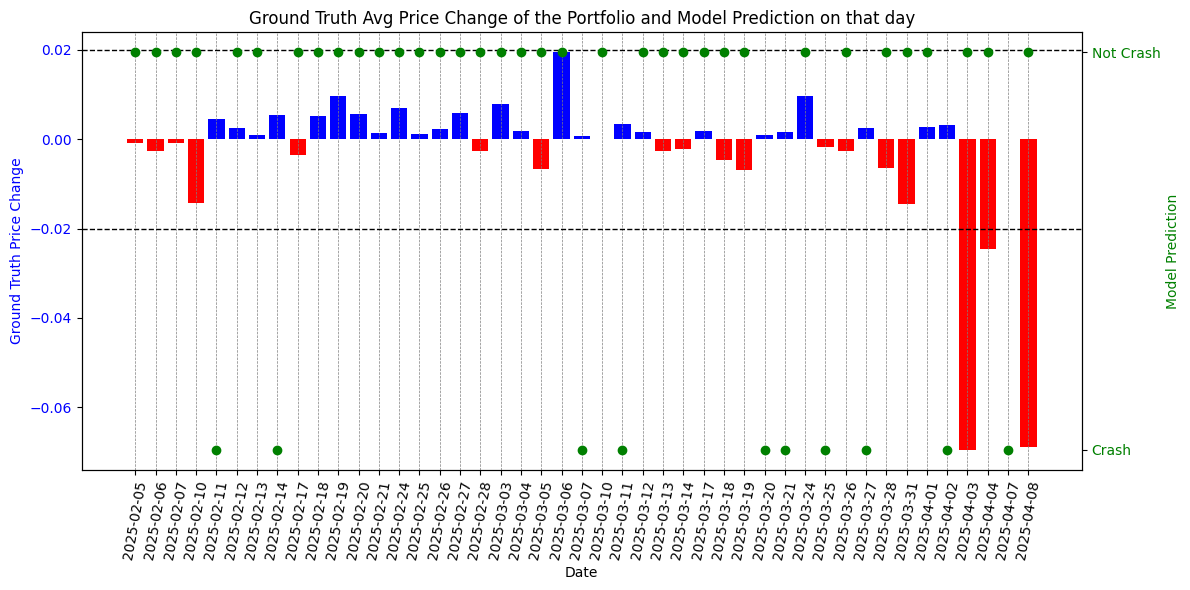

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for avg_pct_change with color based on value
colors = ['r' if x < 0 else 'b' for x in crash_prediction_data["avg_pct_change"]]

# Vẽ đường dọc cho từng ngày
for i in range(len(crash_prediction_data["time"])):
    ax1.axvline(x=crash_prediction_data["time"][i], color='gray', linestyle='--', linewidth=0.5)

# Vẽ biểu đồ cột cho avg_pct_change
ax1.bar(crash_prediction_data["time"], crash_prediction_data["avg_pct_change"], color=colors)

# Vẽ 2 đường ngưỡng tại -0.02 và 0.02
ax1.axhline(y=-0.02, color='black', linestyle='--', linewidth=1)
ax1.axhline(y=0.02, color='black', linestyle='--', linewidth=1)

# Cài đặt nhãn trục và màu sắc
ax1.set_xlabel('Date')
ax1.set_ylabel('Ground Truth Price Change', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=80)

# Create a second y-axis for the verdict
ax2 = ax1.twinx()
ax2.scatter(crash_prediction_data["time"], crash_prediction_data["crash_prediction"], color='g', marker='o')
ax2.set_ylabel('Model Prediction', color='g')
ax2.tick_params(axis='y', labelcolor='g', labelsize=10)
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['Crash', 'Not Crash'])

# Tiêu đề và bố cục
plt.title('Ground Truth Avg Price Change of the Portfolio and Model Prediction on that day')
plt.xlabel('Date')

fig.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import os

# Thư mục chứa file CSV
data_dir = "/content"

# Danh sách file hợp lệ
csv_files = [f for f in os.listdir(data_dir)
             if f.endswith(".csv") and "crash_predictions_" in f and "_to_" in f]

# Danh sách lưu các DataFrame
df_list = []

# Đọc và xử lý từng file
for filename in csv_files:
    file_path = os.path.join(data_dir, filename)
    try:
        df = pd.read_csv(file_path)
        if {'prediction_date', 'crash_prediction'}.issubset(df.columns):
            df_list.append(df[['prediction_date', 'crash_prediction']])
        else:
            print(f"Bỏ qua file {filename}: thiếu cột cần thiết.")
    except Exception as e:
        print(f"Lỗi khi đọc {filename}: {e}")

# Gộp tất cả thành crash4
if df_list:
    crash4 = pd.concat(df_list, ignore_index=True)
    print(f"Đã gộp {len(df_list)} file. Kích thước tổng: {crash4.shape}")
else:
    crash4 = pd.DataFrame(columns=['prediction_date', 'crash_prediction'])
    print("Không có file nào hợp lệ được gộp.")

# Tùy chọn: sắp xếp theo ngày
crash4['prediction_date'] = pd.to_datetime(crash4['prediction_date'], errors='coerce')
crash4 = crash4.sort_values('prediction_date').reset_index(drop=True)


Đã gộp 9 file. Kích thước tổng: (38, 2)


In [ ]:
crash4.head(40)

,prediction_date,crash_prediction
0,2025-02-05 01:00:00,No
1,2025-02-06 01:00:00,No
2,2025-02-07 01:00:00,No
3,2025-02-10 01:00:00,No
4,2025-02-11 01:00:00,Yes
5,2025-02-12 01:00:00,No
6,2025-02-13 01:00:00,Yes
7,2025-02-14 01:00:00,No
8,2025-02-17 01:00:00,No
9,2025-02-18 01:00:00,No


In [ ]:
import pandas as pd

# Yêu cầu 1: thêm các dòng cụ thể
manual_entries = pd.DataFrame({
    'prediction_date': [
        '2025-03-31', '2025-04-01', '2025-04-02',
        '2025-04-03', '2025-04-04', '2025-04-07', '2025-04-08'
    ],
    'crash_prediction': ['Yes'] * 7
})

# Đảm bảo cột date là datetime để sau này xử lý dễ
manual_entries['prediction_date'] = pd.to_datetime(manual_entries['prediction_date'])

# Gộp vào crash4
crash4 = pd.concat([crash4, manual_entries], ignore_index=True)

# Yêu cầu 2: đọc file crash1.csv và lấy 2 trường
crash1 = pd.read_csv('/content/crash1.csv')

# Kiểm tra sự tồn tại của các cột
required_cols = ['avg_pct_change', 'kết quả']
if all(col in crash1.columns for col in required_cols):
    # Chỉ lấy số dòng bằng với crash4 nếu cần tránh lỗi
    min_len = min(len(crash4), len(crash1))
    crash4 = crash4.iloc[:min_len].copy()
    crash1 = crash1.iloc[:min_len].copy()

    # Gộp 2 cột mới vào crash4
    crash4['avg_pct_change'] = crash1['avg_pct_change'].values
    crash4['kết quả'] = crash1['kết quả'].values
else:
    print("❌ File crash1.csv không chứa đủ 2 cột 'avg_pct_change' và 'kết quả'")


In [ ]:
crash4["crash_prediction"] = crash4["crash_prediction"].map({"Yes": 1, "No": 0})
crash4.head(5)

,prediction_date,crash_prediction,avg_pct_change,kết quả
0,2025-02-05 01:00:00,0,-0.000775,0
1,2025-02-06 01:00:00,0,-0.002680,1
2,2025-02-07 01:00:00,0,-0.000946,0
3,2025-02-10 01:00:00,0,-0.014179,0
4,2025-02-11 01:00:00,1,0.004614,0


In [ ]:
# Đảm bảo cột avg_pct_change ở dạng số
crash4['avg_pct_change'] = pd.to_numeric(crash4['avg_pct_change'], errors='coerce')

# Tạo cột true_label theo điều kiện
crash4['true_label'] = (crash4['avg_pct_change'] < -0.02).astype(int)
crash4.head(5)

,prediction_date,crash_prediction,avg_pct_change,kết quả,true_label
0,2025-02-05 01:00:00,0,-0.000775,0,0
1,2025-02-06 01:00:00,0,-0.002680,1,0
2,2025-02-07 01:00:00,0,-0.000946,0,0
3,2025-02-10 01:00:00,0,-0.014179,0,0
4,2025-02-11 01:00:00,1,0.004614,0,0


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Danh sách file và tên để hiển thị
files = {
    'io_predictions': '/content/io_predictions.csv',
    'cot_predictions': '/content/cot_predictions.csv',
    'gotprediction': '/content/got_prediction.csv',
    'crash6': '/content/crash6.csv',
    'crash5': '/content/crash5.csv',
}

# Nếu bạn có file .csv, đổi tên file cho phù hợp. Nếu là dataframe trong code, thay đổi cách load tương ứng

results = []

for name, filepath in files.items():
    # Load data
    df = pd.read_csv(filepath)

    # Fill NaN values in 'true_label' before converting to int
    # This handles cases where the merge resulted in missing avg_pct_change
    # Assuming NaN in true_label should be treated as non-crash (0)
    if 'true_label' in df.columns:
        df['true_label'] = df['true_label'].fillna(0)
    else:
        # If 'true_label' is not present, you might need to re-create it
        # based on 'avg_pct_change' and the crash threshold if available
        # For this fix, we assume 'true_label' exists but might have NaNs.
        print(f"Warning: 'true_label' column not found in {filepath}. Skipping evaluation for this file.")
        continue # Skip to the next file

    # Chuyển dữ liệu sang int nếu chưa
    # Ensure 'crash_prediction' is also handled if it might contain non-integer types
    if 'crash_prediction' in df.columns:
         y_pred = df['crash_prediction'].astype(int)
    elif 'GoT_prediction' in df.columns and name == 'gotprediction':
         # Handle the specific case for gotprediction file
         y_pred = df['GoT_prediction'].astype(int)
    else:
        print(f"Warning: 'crash_prediction' or 'GoT_prediction' column not found in {filepath}. Skipping evaluation for this file.")
        continue # Skip to the next file


    y_true = df['true_label'].astype(int)

    # Check if y_true and y_pred have the same length before calculating metrics
    if len(y_true) != len(y_pred):
         print(f"Warning: Length mismatch between 'true_label' ({len(y_true)}) and prediction ({len(y_pred)}) in {filepath}. Skipping evaluation for this file.")
         continue # Skip to the next file


    # Tính các chỉ số
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    # Lấy các giá trị TP, FP, FN, TN
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    TN = cm[0,0]

    results.append({
        'File': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'TP': TP,
        'FP': FP,
        'FN': FN,
        'TN': TN
    })

# Tạo dataframe kết quả để dễ nhìn
results_df = pd.DataFrame(results)

# In bảng so sánh
print(results_df)

              File  Accuracy  Precision    Recall  F1 Score  TP  FP  FN  TN
0   io_predictions  0.775510       0.00  0.000000  0.000000   0   8   3  38
1  cot_predictions  0.666667       0.00  0.000000  0.000000   0  12   3  30
2    gotprediction  0.940000       0.00  0.000000  0.000000   0   0   3  47
3           crash6  0.511111       0.12  1.000000  0.214286   3  22   0  20
4           crash5  0.844444       0.25  0.666667  0.363636   2   6   1  36


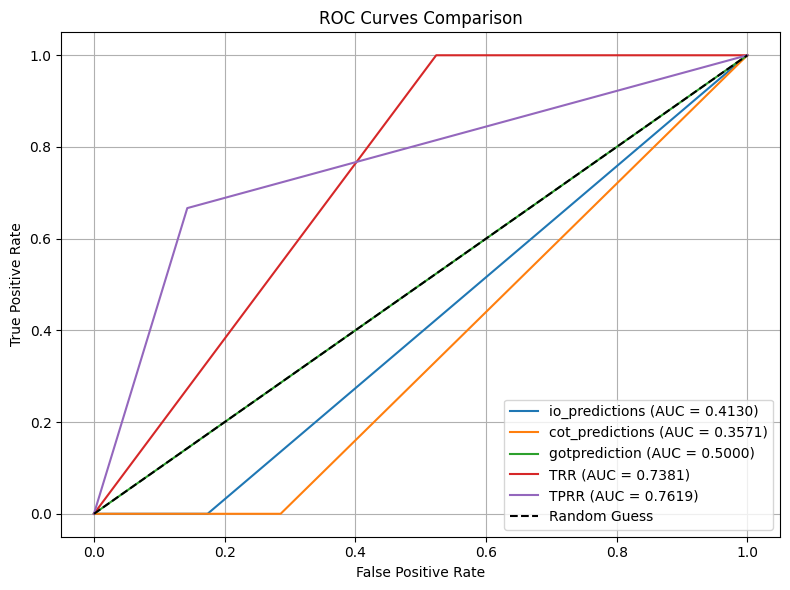

In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Danh sách file và tên để hiển thị
files = {
    'io_predictions': '/content/io_predictions.csv',
    'cot_predictions': '/content/cot_predictions.csv',
    'gotprediction': '/content/got_prediction.csv',
    'TRR': '/content/crash6.csv',
    'TPRR': '/content/crash5.csv',
}

plt.figure(figsize=(8, 6))

for name, filepath in files.items():
    df = pd.read_csv(filepath)

    # Fill NaN và chuyển kiểu
    y_true = df['true_label'].fillna(0).astype(int)
    y_pred = df['crash_prediction'].fillna(0).astype(int)

    # Tính ROC curve và AUC
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred)

    # Vẽ đường ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

# Đường chéo random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import re
import os

# Sample avg_pct_change_df as provided in the prompt
data = {
    # 'time': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
    'avg_pct_change': [-0.000775, -0.002680, -0.000946, -0.014179, 0.004614, 0.002617, 0.000958, 0.005537, -0.003521, 0.005307, 0.009730, 0.005620, 0.001441, 0.006915, 0.001137, 0.002321, 0.005773, -0.002686, 0.007897, 0.001931, -0.006589, 0.019488, 0.000714, 0.000005, 0.003353, 0.001520, -0.002641, -0.002280, 0.001927, -0.004562, -0.006779, 0.000908, 0.001655, 0.009631, -0.001797, -0.002733, 0.002440, -0.006497, -0.014382, 0.002813, 0.003087, -0.069482, -0.024587, -0.068839],
    'Date': ['2025-02-05', '2025-02-06', '2025-02-07', '2025-02-10', '2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14', '2025-02-17', '2025-02-18', '2025-02-19', '2025-02-20', '2025-02-21', '2025-02-24', '2025-02-25', '2025-02-26', '2025-02-27', '2025-02-28', '2025-03-03', '2025-03-04', '2025-03-05', '2025-03-06', '2025-03-07', '2025-03-10', '2025-03-11', '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-17', '2025-03-18', '2025-03-19', '2025-03-20', '2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27', '2025-03-28', '2025-03-31', '2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-08']
}
avg_pct_change_df = pd.DataFrame(data)
avg_pct_change_df['Date'] = pd.to_datetime(avg_pct_change_df['Date']).dt.date

# Directory where your prediction CSV files are located
prediction_files_directory = '/content/' # Change this if your files are in a different directory

# List to store extracted data
extracted_data = []

# Iterate through each prediction file
found_prediction_files = False
for filename in os.listdir(prediction_files_directory):
    if filename.startswith('prediction_results_') and filename.endswith('.csv'):
        found_prediction_files = True
        filepath = os.path.join(prediction_files_directory, filename)

        try:
            with open(filepath, 'r', encoding='utf-8') as f:
                content = f.read()

            # Extract prediction date
            # The date is present in the filename itself
            date_match = re.search(r'prediction_results_(\d{4}-\d{2}-\d{2})\.csv', filename)
            prediction_date = date_match.group(1) if date_match else None

            # Extract prediction result (Yes/No) from the end of the content
            result_match = re.search(r'Crash:\s*(Yes|No)"?$', content.strip()) # Thêm "?" cho dấu nháy kép tùy chọn
            prediction_result = result_match.group(1) if result_match else None

            if prediction_date and prediction_result:
                extracted_data.append({
                    'Prediction_Date': pd.to_datetime(prediction_date).date(),
                    'Prediction_Result': prediction_result
                })
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

if not found_prediction_files:
    print(f"No prediction files found in directory: {prediction_files_directory}")

# Create a DataFrame from the extracted data
# Ensure columns are present even if extracted_data is empty
if extracted_data:
    predictions_df = pd.DataFrame(extracted_data)
else:
    predictions_df = pd.DataFrame(columns=['Prediction_Date', 'Prediction_Result'])


# Merge the two DataFrames
# We'll merge on the 'Date' column from avg_pct_change_df and 'Prediction_Date' from predictions_df
merged_df = pd.merge(avg_pct_change_df, predictions_df, left_on='Date', right_on='Prediction_Date', how='left')

# # Drop the redundant 'Prediction_Date' column if you wish
# merged_df.drop(columns=['Prediction_Date'], inplace=True)

# # --- Chuyển đổi giá trị 'Date' cần xóa sang định dạng datetime.date để khớp ---
# date_to_remove = pd.to_datetime('2025-02-21').date()

# # --- Xóa hàng có Date là '2025-02-21' ---
# # Cách 1: Lọc những hàng KHÔNG có ngày đó
# merged_df = merged_df[merged_df['Date'] != date_to_remove]

merged_df

,avg_pct_change,Date,Prediction_Date,Prediction_Result
0,-0.000775,2025-02-05,2025-02-05,No
1,-0.002680,2025-02-06,2025-02-06,Yes
2,-0.000946,2025-02-07,2025-02-07,No
3,-0.014179,2025-02-10,2025-02-10,No
4,0.004614,2025-02-11,2025-02-11,Yes
5,0.002617,2025-02-12,2025-02-12,Yes
6,0.000958,2025-02-13,2025-02-13,No
7,0.005537,2025-02-14,2025-02-14,No
8,-0.003521,2025-02-17,2025-02-17,No
9,0.005307,2025-02-18,2025-02-18,No


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date

# --- Create True Labels (y_true) ---
# If avg_pct_change <= -0.02, then 1 (crash), else 0 (no crash)
merged_df['True_Label'] = (merged_df['avg_pct_change'] <= -0.02).astype(int)

# --- Create Predicted Labels (y_pred) ---
# If Prediction_Result is 'Yes', then 1 (predicted crash), else 0 (predicted no crash)
# Using LabelBinarizer for robust conversion
lb = LabelBinarizer()

# Fill NaN values in 'Prediction_Result' with 'No' before binarizing
merged_df['Prediction_Result'] = merged_df['Prediction_Result'].fillna('No')

merged_df['Predicted_Label'] = lb.fit_transform(merged_df['Prediction_Result'])

In [ ]:



# Define true labels and predicted labels
y_true = merged_df['True_Label']
y_pred = merged_df['Predicted_Label']

# --- Calculate Classification Metrics ---
print("--- Classification Metrics ---")

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
# For binary classification, specify pos_label=1
precision = precision_score(y_true, y_pred, pos_label=1)
print(f"Precision: {precision:.4f}")

# Recall
# For binary classification, specify pos_label=1
recall = recall_score(y_true, y_pred, pos_label=1)
print(f"Recall: {recall:.4f}")

# F1-Score
# For binary classification, specify pos_label=1
f1 = f1_score(y_true, y_pred, pos_label=1)
print(f"F1-Score: {f1:.4f}")

# AUC (Area Under the Receiver Operating Characteristic Curve)
# AUC requires probability scores, but if we only have binary predictions (0 or 1),
# we can use them directly as if they were probabilities (0 or 1).
# However, it's more common to calculate AUC with actual prediction probabilities.
# If your 'Prediction_Result' doesn't come with a confidence score,
# using the binary prediction for AUC is a simplification.
try:
    auc = roc_auc_score(y_true, y_pred)
    print(f"AUC: {auc:.4f}")
except ValueError as e:
    print(f"Could not calculate AUC: {e}. AUC typically requires probability scores for y_pred.")

--- Classification Metrics ---
Accuracy: 0.6364
Precision: 0.1579
Recall: 1.0000
F1-Score: 0.2727
AUC: 0.8049


/tmp/ipython-input-10-3895868187.py:71: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linestyle='--', color='gray', linewidth=1)
/tmp/ipython-input-10-3895868187.py:71: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linestyle='--', color='gray', linewidth=1)


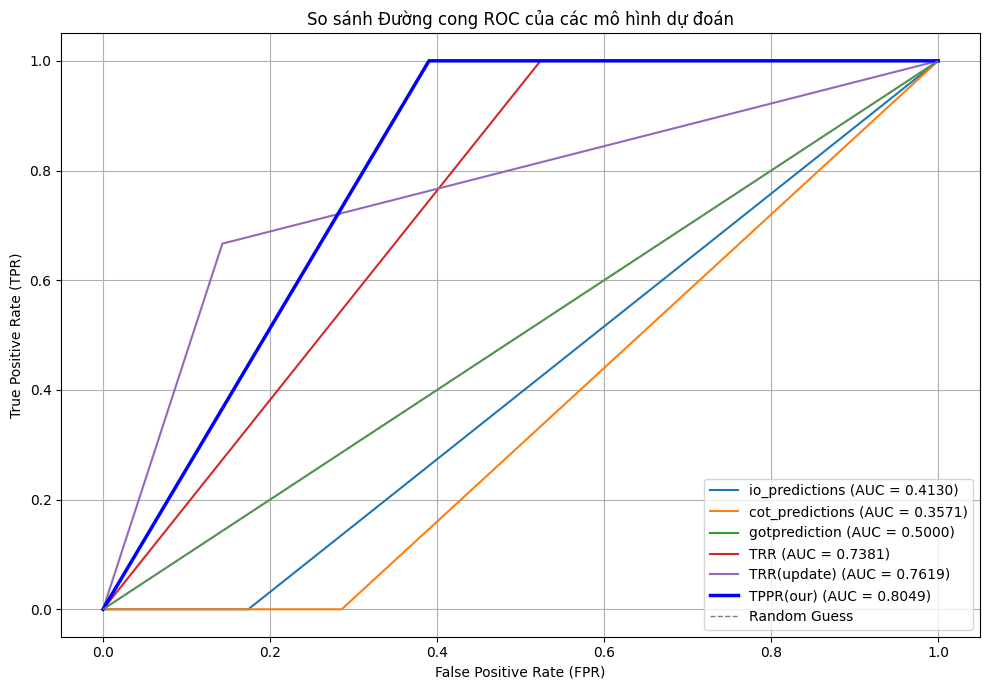

In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np # Dùng cho việc tạo dummy data nếu cần


# Danh sách file và tên để hiển thị (từ code gốc của bạn)
files = {
    'io_predictions': '/content/io_predictions.csv',
    'cot_predictions': '/content/cot_predictions.csv',
    'got_prediction': '/content/got_prediction.csv',
    'TRR': '/content/crash6.csv',
    'TRR(update)': '/content/crash5.csv',
}

plt.figure(figsize=(10, 7)) # Tăng kích thước hình để dễ nhìn hơn

# --- Vẽ ROC cho các file từ dictionary 'files' ---
for name, filepath in files.items():
    try:
        df = pd.read_csv(filepath)

        # Fill NaN và chuyển kiểu (như trong code gốc của bạn)
        # Giả định các file này có cột 'true_label' và 'crash_prediction'
        y_true = df['true_label'].fillna(0).astype(int)
        y_pred = df['crash_prediction'].fillna(0).astype(int)

        # Kiểm tra xem có đủ lớp (0 và 1) để tính ROC không
        if len(y_true.unique()) < 2:
            print(f"Cảnh báo: Không thể vẽ ROC cho {name} vì nhãn thực tế chỉ chứa một lớp. Bỏ qua.")
            continue # Bỏ qua file này và tiếp tục vòng lặp

        # Tính ROC curve và AUC
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        auc_score = roc_auc_score(y_true, y_pred)

        # Vẽ đường ROC
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

    except FileNotFoundError:
        print(f"Cảnh báo: File '{filepath}' không tìm thấy. Bỏ qua '{name}'.")
    except KeyError as e:
        print(f"Cảnh báo: File '{filepath}' thiếu cột cần thiết '{e}'. Bỏ qua '{name}'.")
    except Exception as e:
        print(f"Lỗi khi xử lý file '{filepath}': {e}. Bỏ qua '{name}'.")

# --- Vẽ ROC cho merged_df (TPPR(our)) ---
# Lấy nhãn thực tế và nhãn dự đoán từ merged_df
# Đảm bảo bỏ qua các hàng có NaN trong cả hai cột này
plot_df_cleaned = merged_df.dropna(subset=['True_Label', 'Predicted_Label'])

if plot_df_cleaned.empty:
    print("\nCảnh báo: Không có đủ dữ liệu (sau khi loại bỏ NaN) từ merged_df để vẽ đường TPPR(our).")
else:
    y_true_merged = plot_df_cleaned['True_Label']
    y_pred_merged = plot_df_cleaned['Predicted_Label']

    # Kiểm tra xem có đủ lớp (0 và 1) trong y_true không
    if len(y_true_merged.unique()) < 2:
        print("\nCảnh báo: Không thể vẽ ROC cho TPPR(our) vì nhãn thực tế (True_Label) trong merged_df chỉ chứa một lớp.")
    else:
        # Tính ROC curve và AUC cho merged_df
        fpr_merged, tpr_merged, _ = roc_curve(y_true_merged, y_pred_merged)
        auc_score_merged = roc_auc_score(y_true_merged, y_pred_merged)

        # Vẽ đường ROC cho merged_df với tên "TPPR(our)"
        plt.plot(fpr_merged, tpr_merged, label=f'TPPR(our) (AUC = {auc_score_merged:.4f})',
                 color='blue', linestyle='-', linewidth=2.5) # Làm nổi bật đường này

# Đường chéo random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linestyle='--', color='gray', linewidth=1)

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('So sánh Đường cong ROC của các mô hình dự đoán')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import os
import re

def process_prediction_file(file_path):
    """
    Đọc một file dự đoán, trích xuất ngày dự đoán, trạng thái "Crash",
    và toàn bộ nội dung dự đoán.
    """
    try:
        df = pd.read_csv(file_path, encoding='utf-8')

        if df.empty or 'prediction_content' not in df.columns:
            print(f"File {file_path} không có cột 'prediction_content' hoặc rỗng. Bỏ qua.")
            return None

        full_response = df['prediction_content'].iloc[0]

        # Trích xuất ngày dự đoán từ tên file
        # Ví dụ: /content/prediction_results_2025-02-27.csv -> 2025-02-27
        date_match = re.search(r'prediction_results_(\d{4}-\d{2}-\d{2})\.csv', file_path)
        prediction_date = None
        if date_match:
            # Chuyển đổi định dạng ngày thành ISO 8601 nếu cần, ví dụ thêm múi giờ giả định
            prediction_date = f"{date_match.group(1)}T01:00:00+07:00"
        else:
            print(f"Không tìm thấy định dạng ngày trong tên file: {file_path}. Bỏ qua.")
            return None

        # Trích xuất crash_prediction (Yes/No)
        crash_match = re.search(r'Crash: (Yes|No)', full_response, re.IGNORECASE)
        crash_prediction = crash_match.group(1).capitalize() if crash_match else "Unknown"

        return {
            "prediction_date": prediction_date,
            "crash_prediction": crash_prediction,
            "full_response": full_response
        }
    except Exception as e:
        print(f"Lỗi khi xử lý file {file_path}: {e}")
        return None

def merge_prediction_files(input_directory, output_file_name="TPPR(our_updated).csv"):
    """
    Tìm tất cả các file dự đoán trong thư mục input_directory,
    xử lý chúng và gộp vào một file CSV duy nhất.
    """
    all_predictions = []

    # Duyệt qua tất cả các file trong thư mục đầu vào
    for filename in os.listdir(input_directory):
        if filename.startswith("prediction_results_") and filename.endswith(".csv"):
            file_path = os.path.join(input_directory, filename)
            print(f"Đang xử lý file: {file_path}")
            prediction_data = process_prediction_file(file_path)
            if prediction_data:
                all_predictions.append(prediction_data)

    if not all_predictions:
        print("Không tìm thấy file dự đoán nào để xử lý.")
        return

    # Tạo DataFrame từ danh sách các dự đoán
    merged_df = pd.DataFrame(all_predictions)

    # Sắp xếp theo ngày dự đoán nếu cần
    merged_df['prediction_date'] = pd.to_datetime(merged_df['prediction_date'], errors='coerce')
    merged_df = merged_df.sort_values(by='prediction_date').reset_index(drop=True)
    merged_df['prediction_date'] = merged_df['prediction_date'].dt.strftime('%Y-%m-%dT%H:%M:%S%z') # Đưa về lại định dạng string

    # Lưu DataFrame ra file CSV
    merged_df.to_csv(output_file_name, index=False, encoding='utf-8')
    print(f"\nĐã gộp thành công {len(all_predictions)} file vào {output_file_name}")

# Call the function directly with the desired arguments
merge_prediction_files(input_directory="/content", output_file_name="TPPR(our_updated).csv")

Đang xử lý file: /content/prediction_results_2025-03-26.csv
Đang xử lý file: /content/prediction_results_2025-02-25.csv
Đang xử lý file: /content/prediction_results_2025-02-06.csv
Đang xử lý file: /content/prediction_results_2025-02-18.csv
Đang xử lý file: /content/prediction_results_2025-04-03.csv
Đang xử lý file: /content/prediction_results_2025-03-10.csv
Đang xử lý file: /content/prediction_results_2025-02-28.csv
Đang xử lý file: /content/prediction_results_2025-03-13.csv
Đang xử lý file: /content/prediction_results_2025-02-20.csv
Đang xử lý file: /content/prediction_results_2025-03-18.csv
Đang xử lý file: /content/prediction_results_2025-03-04.csv
Đang xử lý file: /content/prediction_results_2025-02-26.csv
Đang xử lý file: /content/prediction_results_2025-02-27.csv
Đang xử lý file: /content/prediction_results_2025-02-11.csv
Đang xử lý file: /content/prediction_results_2025-04-04.csv
Đang xử lý file: /content/prediction_results_2025-04-02.csv
Đang xử lý file: /content/prediction_res

In [ ]:
import pandas as pd


PORTFOLIO_STOCKS = ["FPT", "SSI", "VCB", "VHM", "HPG", "GAS", "MSN", "MWG", "GVR", "VCG"]

fin_df = pd.DataFrame()
# Load price data of all stocks in portfolio, in price/1d/ folder, into a new df with a date column, then column name is stock name, and a column is average percentage change of price of all stocks in portfolio
for stock in PORTFOLIO_STOCKS:
    # Add the date to the new df
    price_data = pd.read_csv(f"/content/{stock}.csv")
    fin_df["time"] = price_data["time"]
    # Calculate the percentage change of price
    price_data["pct_change"] = price_data["close"].pct_change()

    # Add the average percentage change to the new df
    fin_df[stock] = price_data["pct_change"]

# Calculate the average percentage change of price of all stocks in portfolio by each day
fin_df["avg_pct_change"] = fin_df.iloc[:, 1:].mean(axis=1)

fin_df
# Load crash prediction data
crash_prediction_data = pd.read_csv("/content/TPPR(our_updated).csv")

# Map crash_prediction "Yes/No" to 1/0
crash_prediction_data["crash_prediction"] = crash_prediction_data["crash_prediction"].map({"Yes": 1, "No": 0})

# Take only YYYY-MM-DD from time column
crash_prediction_data["time"] = crash_prediction_data["prediction_date"].str[:10]

# Drop the explanation column
crash_prediction_data = crash_prediction_data.drop(columns=["full_response"])

# Merge crash_prediction_data with fin_df on time column
crash_prediction_data = crash_prediction_data.merge(fin_df[["avg_pct_change", "time"]], on="time", how="left")

# Add a column verdict: if crash_prediction_data["crash"] == 1 and crash_prediction_data["avg_pct_change"] < -0.02 then 1 else 0
crash_prediction_data["verdict"] = crash_prediction_data.apply(
    lambda row: 1 if (row["crash_prediction"] == 1 and row["avg_pct_change"] < -0.02)
    or (row["crash_prediction"] == 0 and row["avg_pct_change"] > -0.02)
    else 0,
    axis=1)


crash_prediction_data

,prediction_date,crash_prediction,time,avg_pct_change,verdict
0,2025-02-05T01:00:00+0700,0,2025-02-05,-0.000775,1
1,2025-02-06T01:00:00+0700,1,2025-02-06,-0.002680,0
2,2025-02-07T01:00:00+0700,0,2025-02-07,-0.000946,1
3,2025-02-10T01:00:00+0700,0,2025-02-10,-0.014179,1
4,2025-02-11T01:00:00+0700,1,2025-02-11,0.004614,0
5,2025-02-12T01:00:00+0700,1,2025-02-12,0.002617,0
6,2025-02-13T01:00:00+0700,0,2025-02-13,0.000958,1
7,2025-02-14T01:00:00+0700,0,2025-02-14,0.005537,1
8,2025-02-17T01:00:00+0700,0,2025-02-17,-0.003521,1
9,2025-02-18T01:00:00+0700,0,2025-02-18,0.005307,1


Đang đọc dữ liệu từ file: /content/prediction_LLM(5-0,5-0,1) (1).csv
--- Kết quả đánh giá mô hình ---
Accuracy: 0.3256
Precision: 0.0938
Recall: 1.0000
F1-Score: 0.1714
AUC: 0.6375


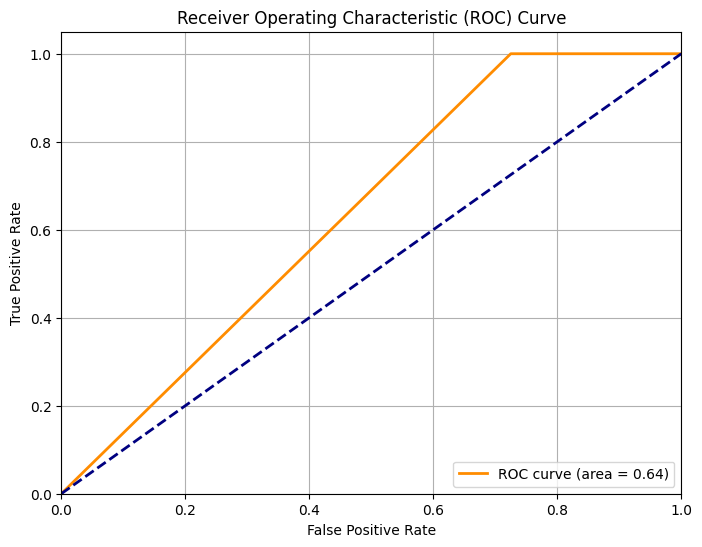

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import os # Import os for file operations

def evaluate_predictions(df: pd.DataFrame):
    """
    Tính toán và in ra các chỉ số hiệu suất (accuracy, precision, recall, f1-score, AUC)
    dựa trên các cột 'crash_prediction' (predicted label) và 'true_label'.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu với các cột:
                           'crash_prediction' (có thể là 'Yes'/'No' hoặc 0/1),
                           'true_label' (đã là 0/1).
    """

    # --- BỔ SUNG: Chuyển đổi 'crash_prediction' sang dạng số (1 cho 'Yes', 0 cho 'No') ---
    # Đây là dòng mới/sửa đổi để xử lý 'Yes'/'No' thành 1/0
    df['crash_prediction'] = df['predict'].apply(
        lambda x: 1 if pd.notna(x) and str(x).strip().lower() == 'yes' else 0
    )
    # ----------------------------------------------------------------------------------

    # Đảm bảo các cột là kiểu số nguyên sau khi chuyển đổi
    df['true_label'] = df['true_label'].astype(int)
    df['crash_prediction'] = df['crash_prediction'].astype(int)

    # Lấy nhãn thực tế và nhãn dự đoán
    true_labels = df['true_label']
    predicted_labels = df['crash_prediction']

    print("--- Kết quả đánh giá mô hình ---")

    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision
    # zero_division=0 để trả về 0 nếu không có positive samples nào được dự đoán
    precision = precision_score(true_labels, predicted_labels, zero_division=0)
    print(f"Precision: {precision:.4f}")

    # Recall
    recall = recall_score(true_labels, predicted_labels, zero_division=0)
    print(f"Recall: {recall:.4f}")

    # F1-score
    f1 = f1_score(true_labels, predicted_labels, zero_division=0)
    print(f"F1-Score: {f1:.4f}")

    # AUC (Area Under the Receiver Operating Characteristic Curve)
    if len(np.unique(true_labels)) < 2 or len(np.unique(predicted_labels)) < 2:
        print("\nKhông đủ số lượng lớp (cả true và predicted) để tính toán AUC ROC. Cần ít nhất 2 lớp.")
        auc = np.nan
    else:
        try:
            # Ở đây chúng ta coi predicted_labels (0 hoặc 1) là "điểm" dự đoán.
            # Nếu có xác suất dự đoán thực tế, bạn nên sử dụng cột xác suất đó thay thế.
            auc = roc_auc_score(true_labels, predicted_labels)
            print(f"AUC: {auc:.4f}")

            # Vẽ đường cong ROC (tùy chọn)
            fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.grid(True)
            plt.show()

        except ValueError as e:
            print(f"\nLỗi khi tính toán AUC: {e}. Thường xảy ra khi chỉ có một lớp trong true_labels hoặc predicted_labels.")
            auc = np.nan

# --- Cách sử dụng ---
if __name__ == "__main__":
    input_filename = "/content/prediction_LLM(5-0,5-0,1) (1).csv"

    # Kiểm tra xem file có tồn tại không
    if not os.path.exists(input_filename):
        print(f"Lỗi: File '{input_filename}' không tìm thấy.")

    else:
        # Nếu file tồn tại, đọc nó vào DataFrame
        print(f"Đang đọc dữ liệu từ file: {input_filename}")
        df_to_evaluate = pd.read_csv(input_filename)

    # Gọi hàm để tính toán các chỉ số
    # Sử dụng .copy() để tránh cảnh báo SettingWithCopyWarning
    evaluate_predictions(df_to_evaluate.copy())

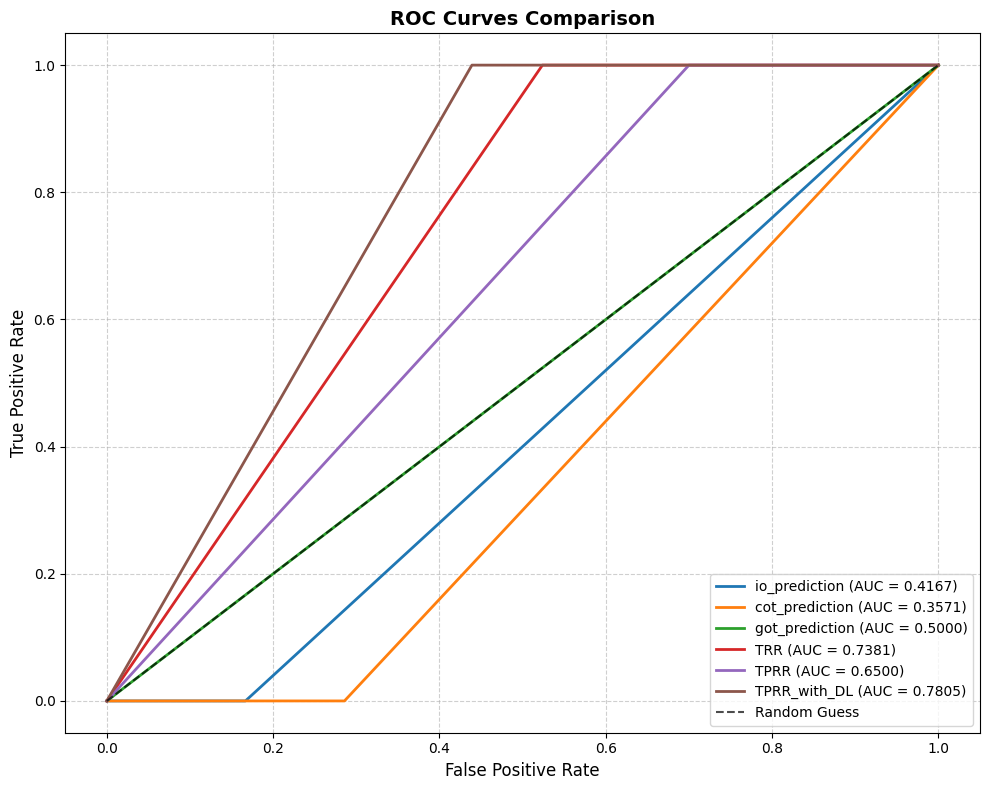


--- Classification Model Comparison Table ---
                  AUC  Accuracy  Precision  Recall  F1-Score
Model                                                       
TPRR_with_DL   0.7805    0.5909     0.1429  1.0000    0.2500
TRR            0.7381    0.5111     0.1200  1.0000    0.2143
TPRR           0.6500    0.3488     0.0968  1.0000    0.1765
got_prediction 0.5000    0.9333     0.0000  0.0000    0.0000
io_prediction  0.4167    0.7778     0.0000  0.0000    0.0000
cot_prediction 0.3571    0.6667     0.0000  0.0000    0.0000


In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Dictionary of file paths and corresponding display names
model_data_files = {
    'io_prediction': '/content/io_predictions.csv',
    'cot_prediction': '/content/cot_predictions.csv',
    'got_prediction': '/content/got_prediction.csv',
    'TRR': '/content/crash6.csv',
    'TPRR': '/content/prediction_LLM(5-0,5-0,1) (1).csv',
    'TPRR_with_DL': '/content/prediction_NER(5-0,5-0,1).csv',
}

plt.figure(figsize=(10, 8))

# List to store results for the comparison table
results = []

for name, filepath in model_data_files.items():
    try:
        df = pd.read_csv(filepath)

        # Determine the correct prediction column name for the current file
        # 'crash_prediction' is the primary, 'predict' is the fallback.
        # As you mentioned, for 'io_prediction' and 'got_prediction', it's 'crash_prediction'
        prediction_col_name = 'crash_prediction'

        # This check is still useful if other files might have 'predict'
        if 'predict' in df.columns and 'crash_prediction' not in df.columns:
            prediction_col_name = 'predict'

        # Check if 'true_label' and the determined prediction column exist
        if 'true_label' not in df.columns or prediction_col_name not in df.columns:
            print(f"Warning: Skipping '{name}' due to missing 'true_label' or '{prediction_col_name}' column.")
            continue

        # --- Initial conversion to numeric, coercing errors to NaN ---
        # Convert 'true_label' to numeric, handling potential non-numeric values
        y_true_raw = pd.to_numeric(df['true_label'], errors='coerce')

        y_pred_raw_series = df[prediction_col_name]

        # --- Conditional Handling for Prediction Column (Yes/No vs. 1/0) ---
        if y_pred_raw_series.dtype == 'object' or y_pred_raw_series.isin(['Yes', 'No']).any():
            # Apply mapping: 'Yes' -> 1, 'No' -> 0, others (including NaN) will become NaN
            y_pred_processed = y_pred_raw_series.map({'Yes': 1, 'No': 0}).astype(float)
        else:
            # If not 'Yes'/'No', assume it's already numeric (like 1/0) or needs numeric conversion
            # This covers 'io_prediction' and 'got_prediction' where values are already 1/0
            y_pred_processed = pd.to_numeric(y_pred_raw_series, errors='coerce')
        # --- End Conditional Handling ---

        # --- CRITICAL: Aligning y_true and y_pred based on non-NaN values ---
        # Create a temporary DataFrame to align and drop NaNs simultaneously
        temp_df = pd.DataFrame({
            'y_true': y_true_raw,
            'y_pred': y_pred_processed
        }).dropna() # This drops rows where ANY of the columns are NaN

        if temp_df.empty:
            print(f"Warning: Skipping '{name}' due to no valid (non-NaN) true_label/prediction pairs after cleaning.")
            continue

        y_true = temp_df['y_true'].astype(int)
        y_pred_for_roc = temp_df['y_pred'] # Use float/binary for ROC and AUC
        y_pred_binary_for_metrics = temp_df['y_pred'].astype(int) # Ensure binary (0 or 1) for classification metrics

        # Ensure there are at least two unique values in y_true for AUC calculation and other metrics
        if len(y_true.unique()) < 2:
            print(f"Warning: Skipping '{name}' due to insufficient unique true labels (need at least 2 classes) after cleaning.")
            continue

        # Ensure predictions are not all the same value (e.g., all 0s or all 1s)
        if len(y_pred_binary_for_metrics.unique()) < 2:
            print(f"Warning: Skipping '{name}' as all predictions are the same after cleaning. Metrics might be undefined or trivial.")
            # Assigning specific values for clarity in the table if predictions are constant
            # This is a good place to assign NaN or 0 for problematic metrics if desired.
            # For now, sklearn's zero_division=0 should handle it.

        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_true, y_pred_for_roc) # Use processed y_pred for ROC
        auc_score = roc_auc_score(y_true, y_pred_for_roc) # Use processed y_pred for AUC

        # --- Calculate additional classification metrics ---
        # Use y_pred_binary_for_metrics for these
        accuracy = accuracy_score(y_true, y_pred_binary_for_metrics)
        precision = precision_score(y_true, y_pred_binary_for_metrics, zero_division=0)
        recall = recall_score(y_true, y_pred_binary_for_metrics, zero_division=0)
        f1 = f1_score(y_true, y_pred_binary_for_metrics, zero_division=0)

        # Store metrics
        results.append({
            'Model': name,
            'AUC': auc_score,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })
        # --- End additional metric calculation ---

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})', linewidth=2)

    except FileNotFoundError:
        print(f"Error: File not found for '{name}' at '{filepath}'. Skipping this file.")
    except Exception as e:
        print(f"An unexpected error occurred while processing '{name}': {e}. Skipping this file.")

# Random Guess Line (dashed black)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', alpha=0.7)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Create and display the comparison table ---
print("\n--- Classification Model Comparison Table ---")
if results:
    results_df = pd.DataFrame(results).set_index('Model').sort_values(by='AUC', ascending=False)
    # Format float columns for better readability
    pd.options.display.float_format = '{:,.4f}'.format
    print(results_df)
    # Reset float format if needed later (good practice if you're doing more numerical work)
    pd.options.display.float_format = None
else:
    print("No data available to generate the comparison table.")